Primeiro é realizado o import da classe JogoDaForca, seguindo as especificações descritas


In [5]:
from jogoDeForca import JogoDeForca

In [6]:
def calcular_frequencia_letras(palavras, letras_tentadas):
    frequencia = {}
    letras_alfabeto = 'abcdefghijklmnopqrstuvwxyz'
    for palavra in palavras:
        for letra in letras_alfabeto:
            if letra in palavra:
                if letra not in letras_tentadas:
                    if letra in frequencia:
                        frequencia[letra] += 1
                    else:
                        frequencia[letra] = 1
    return frequencia

def escolher_letra(frequencia):
    letra_mais_frequente = max(frequencia, key=frequencia.get)
    return letra_mais_frequente


In [7]:
## Função que verifica se uma palavra é compatível com a palavra parcial e a tentativa
def palavra_compatible(palavra, palavra_parcial, tentativa):
    if len(palavra) != len(palavra_parcial): ## se o tamanho da palavra for diferente do tamanho da palavra parcial,
                                             ## deve ser descartada
        return False

    for idx, letra in enumerate(palavra_parcial): 
        ## verifica se a palavra não tem a letra tentada numa posição onde ela aparece na palavra parcial
        if letra == "_" and palavra[idx] == tentativa: 
            return False
        
        ## verifica se a palavra tem uma letra diferente da letra tentada numa posição onde ela aparece na palavra parcial
        if letra != "_" and palavra[idx] != letra:
            return False
    return True


def jogar(jogo):
    tamanho_palavra = jogo.novo_jogo() ## Inicia um novo jogo
    palavra_parcial = ["_" for _ in range(tamanho_palavra)] ## Inicia a palavra parcial com "_" para cada letra
    vidas = jogo.vidas ## recupera o número de vidas
    palavras_possiveis = jogo.content.copy() ## recupera a lista de palavras possíveis, 
                                            ## que é igual a lista de palavras do dicionario do ime-usp
    letras_tentadas = set() ## inicia o conjunto de letras tentadas

    while "_" in palavra_parcial and vidas > 0:  ## enquanto a palavra parcial tiver "_" e vidas > 0
        frequencia = calcular_frequencia_letras(palavras_possiveis, letras_tentadas) ## calcula a frequencia das letras
        tentativa = escolher_letra(frequencia) ## escolhe a letra mais frequente
        letras_tentadas.add(tentativa) ## adiciona a letra escolhida ao conjunto de letras tentadas

        indices = jogo.tentar_letra(tentativa) ## tenta a letra escolhida e recupera os indices onde ela aparece
        if indices: ## se a letra estiver na palavra
            for idx in indices: ## atualiza a palavra parcial
                palavra_parcial[idx] = tentativa
            ## atualiza a lista de palavras possíveis
            palavras_possiveis = [palavra for palavra in palavras_possiveis if palavra_compatible(palavra, palavra_parcial, tentativa)]
        else:
            ## atualiza a lista de palavras possíveis
            palavras_possiveis = [palavra for palavra in palavras_possiveis if tentativa not in palavra]

        ## atualiza o número de vidas
        vidas = jogo.vidas

    return vidas


Total de jogos: 100
Jogos ganhos: 97
Jogos perdidos: 3
Acurácia: 97.00%


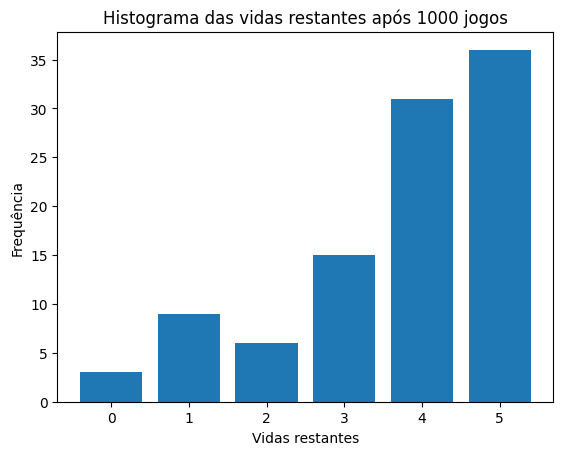

In [8]:
import matplotlib.pyplot as plt
resultados = []
n_jogos = 100
jogo = JogoDeForca()

for _ in range(n_jogos):
    vidas_restantes = jogar(jogo)
    resultados.append(vidas_restantes)

qtd_jogos_ganhos = sum([1 for vidas in resultados if vidas > 0])
print(f"Total de jogos: {n_jogos}")
print(f"Jogos ganhos: {qtd_jogos_ganhos}")
print(f"Jogos perdidos: {sum([1 for vidas in resultados if vidas == 0])}")
print(f"Acurácia: {qtd_jogos_ganhos/n_jogos * 100:.2f}%")

plt.hist(resultados, bins=range(0, 7), align='left', rwidth=0.8)
plt.xlabel('Vidas restantes')
plt.ylabel('Frequência')
plt.title('Histograma das vidas restantes após 1000 jogos')
plt.xticks(range(0, 6))
plt.show()


In [9]:
from jogoDeForcaAnalise import JogoDeForcaParaAnaliseDeErro

jogoAnalise = JogoDeForcaParaAnaliseDeErro()
vidas = jogar(jogoAnalise)
print(vidas)

Letra:  a
Letra:  s
Letra:  o
Letra:  e
Letra:  r
Letra:  l
Letra:  c
Letra:  v
Letra:  d
0
